In [290]:
import pandas as pd

### Part A: Data Cleaning



In [291]:
#Import full data set using Pandas:
data=pd.read_csv('/Users/yangxiang/A List/Uchicago/2020_Spring/Machine_Learning/Week_1/bottle.csv')
data.shape

/Users/yangxiang/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(864863, 74)

In [292]:
#Limit the dataset to the following columns: [T_degC, Salnty, STheta] and then remove all NaN and NA values (Hint: Pandas has a method for this) .
#list(data.columns)
df=data[['T_degC', 'Salnty', 'STheta','O2ml_L','Depthm']]
df=df.dropna()
df.shape

(661268, 5)

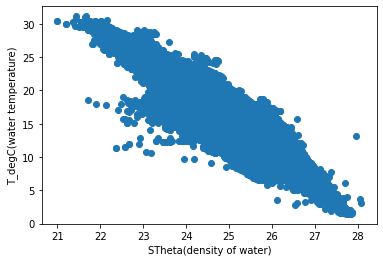

In [293]:
#Scatter: STheta (density of water) vs T_degC
import matplotlib.pyplot as plt
plt.scatter(df['STheta'],df['T_degC'])
plt.xlabel('STheta(density of water)')
plt.ylabel('T_degC(water temperature)')
plt.show()

#According to the scatter plot, the outliner for STheta have already been removed due to NAs in new features.
#(The scatter shoes no obvious outliers)

### Part B: Train / Test Split & Scaling



In [294]:
#1) Create X & y objects
x=df[['Salnty', 'STheta','O2ml_L','Depthm']]
x.shape

(661268, 4)

In [295]:
y=df[['T_degC']]
y.shape

(661268, 1)

In [296]:
#2)Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['Salnty', 'STheta','O2ml_L','Depthm']], df['T_degC'], test_size = 0.2, random_state = 101)



In [297]:
X_train.shape

(529014, 4)

In [298]:
X_test.shape

(132254, 4)

In [299]:
y_train.shape

(529014,)

In [300]:
y_test.shape

(132254,)

In [301]:
#3) Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_train_scaled.shape

(529014, 4)

In [302]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test_scaled=scaler.transform(X_test)
X_test_scaled.shape

(132254, 4)

### Part C: Linear Regression with sklearn

In [303]:
# 1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.
#Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.
#Print out the coefficients (including the intercept)

#2) Print out the coefficients (including the intercept)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
lin_reg.intercept_, lin_reg.coef_

(10.916008608467907,
 array([ 1.63138419, -4.63401189,  0.30214869, -0.47495079]))

In [304]:
#3) Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled!
y_pred_sklearn=lin_reg.predict(X_test_scaled)
y_pred_sklearn

array([ 9.692662  ,  8.86118707, 18.97977917, ..., 12.95656496,
        8.59839049,  7.45169472])

In [305]:
# 4) Calculate the following for the test data:
# - mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_sklearn)

0.11143548657071681

In [306]:
# - r-squared 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_sklearn)

0.9937493291469024

In [307]:
# - explained variance
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred_sklearn)

0.9937527039837577

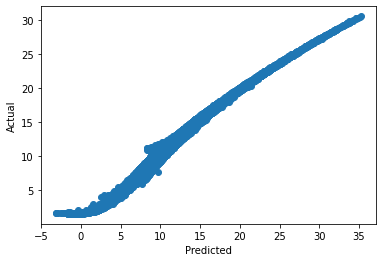

In [308]:
#5) Create a scatterplot that shows actual versus predicted values for the T_degC]
import matplotlib.pyplot as plt
plt.scatter(y_pred_sklearn,y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Part D: Gradient Descent Mini-Batch
##### Please make sure you are using Mini-Batch! Perform the following six steps for mini-batch sizes of: 50, 250, & 2000. Save all outputs

In [309]:
#1) Similar to HW #1, you will need to add a column of 1s to X_train_scaled and X_test_scaled.
import numpy as np
X_train_scaled = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]  # add x0 = 1 to each instance
X_test_scaled = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]  # add x0 = 1 to each instance


In [310]:
y_train=pd.DataFrame(y_train).to_numpy()
y_test=pd.DataFrame(y_test).to_numpy()

In [311]:
#2) The cost function we will use for Gradient Descent is MSE (refer to Equation 4-3 in Hands-On Machine Learning Chapter 4).
#3) Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.

#### minibatch_size = 50



In [312]:
# minibatch_size = 50
theta_path_mgd = []
eta = 0.1
n_iterations = 100
minibatch_size = 50
np.random.seed(42)

m = len(X_train_scaled)
theta = np.random.randn(5,1)  # random initialization

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_train_scaled[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [318]:
theta_50=theta

In [327]:
#Predict T_degC for the test data using the theta_50.
#Make sure to include an intercept value of 1 for every observation in your X_test.
#Call predictions y_pred
y_pred_50 = X_test_scaled.dot(theta_50)
y_pred_50

array([[ 9.67359735],
       [ 8.87012995],
       [18.88036533],
       ...,
       [12.8842794 ],
       [ 8.59896097],
       [ 7.49074087]])

##### Calculate the following for the test data:



In [330]:
# - mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_50)

0.1255819705978429

In [331]:
# - r-squared 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_50)

0.9929558205608736

In [332]:
# - explained variance
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred_50)

0.9929578587419463

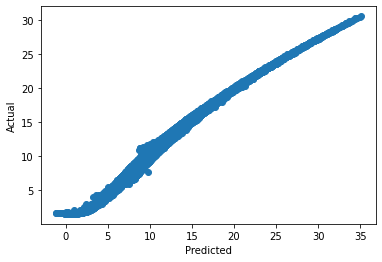

In [340]:
#Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.
import matplotlib.pyplot as plt
plt.scatter(y_pred_50,y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Calculate the following for the train data:



In [346]:
y_pred_train_50 = X_train_scaled.dot(theta_50)


In [347]:
# - mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred_train_50)

0.12548341665839863

In [348]:
# - r-squared 
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train_50)

0.9929706348090523

In [349]:
# - explained variance
from sklearn.metrics import explained_variance_score
explained_variance_score(y_train, y_pred_train_50)

0.9929708022160034

#### minibatch_size = 250



In [322]:
# minibatch_size = 250
theta_path_mgd = []
eta = 0.1
n_iterations = 100
minibatch_size = 250
np.random.seed(42)

m = len(X_train_scaled)
theta_250 = np.random.randn(5,1)  # random initialization

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_train_scaled[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta_250) - yi)
        
        theta_250 = theta_250 - eta * gradients
        theta_path_mgd.append(theta_250)

In [328]:
#Predict T_degC for the test data using the theta_50.
#Make sure to include an intercept value of 1 for every observation in your X_test.
#Call predictions y_pred
y_pred_250 = X_test_scaled.dot(theta_250)
y_pred_250

array([[ 9.68237775],
       [ 8.88480416],
       [18.95633748],
       ...,
       [12.92417106],
       [ 8.59522168],
       [ 7.47459782]])

In [333]:
# 4) Calculate the following for the test data:
# - mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_250)

0.11235448124842862

In [334]:
# - r-squared 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_250)

0.9936977806373306

In [335]:
# - explained variance
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred_250)

0.9936979466821965

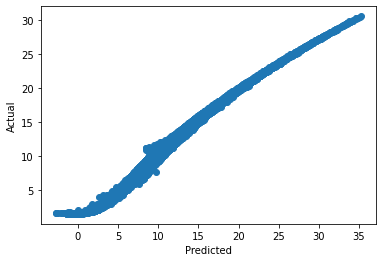

In [339]:
#Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.
import matplotlib.pyplot as plt
plt.scatter(y_pred_250,y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Calculate the following for the train data:



In [350]:
y_pred_train_250 = X_train_scaled.dot(theta_250)



In [351]:
# - mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred_train_250)

0.11175778564923336

In [352]:
# - r-squared 
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train_250)

0.9937395210524216

In [353]:
# - explained variance
from sklearn.metrics import explained_variance_score
explained_variance_score(y_train, y_pred_train_250)

0.9937415620747589

#### minibatch_size = 2000



In [324]:
# minibatch_size = 2000
theta_path_mgd = []
eta = 0.1
n_iterations = 100
minibatch_size = 2000
np.random.seed(42)

m = len(X_train_scaled)
theta_2000 = np.random.randn(5,1)  # random initialization

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_train_scaled[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta_2000) - yi)
        
        theta_2000 = theta_2000 - eta * gradients
        theta_path_mgd.append(theta_2000)

In [329]:
#Predict T_degC for the test data using the theta_50.
#Make sure to include an intercept value of 1 for every observation in your X_test.
#Call predictions y_pred
y_pred_2000 = X_test_scaled.dot(theta_2000)
y_pred_2000

array([[ 9.69026971],
       [ 8.86340495],
       [18.98501005],
       ...,
       [12.95426791],
       [ 8.5957508 ],
       [ 7.45178337]])

In [336]:
# 4) Calculate the following for the test data:
# - mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_2000)

0.11144145690817212

In [337]:
# - r-squared 
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_2000)

0.9937489942570441

In [338]:
# - explained variance
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred_2000)

0.9937514207361556

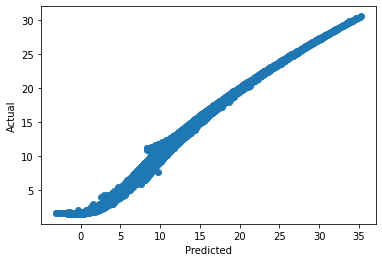

In [341]:
#Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.
import matplotlib.pyplot as plt
plt.scatter(y_pred_2000,y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Calculate the following for the train data:


In [354]:
y_pred_train_2000 = X_train_scaled.dot(theta_2000)



In [355]:
# - mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred_train_2000)

0.11051647844463215

In [356]:
# - r-squared 
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train_2000)

0.9938090569471849

In [357]:
# - explained variance
from sklearn.metrics import explained_variance_score
explained_variance_score(y_train, y_pred_train_2000)

0.9938091348845103

### Part E: Conceptual Questions

#### 1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.


##### The main reason why gradient descent is used for linear regression is the computational complexity: it's computationally cheaper (faster) to find the solution using the gradient descent in some cases.
##### So, the gradient descent allows to save a lot of time on calculations. Moreover, the way it's done allows for a trivial parallelization, i.e. distributing the calculations across multiple processors or machines. The linear algebra solution can also be parallelized but it's more complicated and still expensive.
##### Additionally, there are versions of gradient descent when you keep only a piece of your data in memory, lowering the requirements for computer memory. Overall, for extra large problems it's more efficient than linear algebra solution.




#### 2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

##### The Stochastic Gradient descent picks a random instance in the training data set at every step and computes the gradients based only on that single instance
##### It will shorten the computing time but the algorithm is much less regular than mini-batch graient descent.

##### The mini-batch gradient descent computes the gradients on small random sets of instances called mini-batches. The main advandate of mini-batch GD over Stochastic Gradient Descent is that you can get a performance boost from hardware optimization of matrix operations,especially when using GPUs




#### 3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.
##### minibatch_size = 2000 is my best-performing version of Gradient Descent. 
##### Training: MSE=0.11051647844463215, r-squared=0.9938090569471849 , explained variance=0.9938091348845103
##### Testing:  MSE=0.11144145690817212, r-squared=0.9937489942570441 , explained variance=0.9937514207361556
##### It does not show the sign of overfitting since i did not see the significant drop of accuray in between training and testing results






#### 4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?
##### The amount that the weights are updated during training is referred to as the step size or the “learning rate.” Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0.The learning rate controls how quickly the model is adapted to the problem. Smaller learning rates require more training epochs given the smaller changes made to the weights each update, whereas larger learning rates result in rapid changes and require fewer training epochs.A learning rate that is too large can cause the model to converge too quickly to a suboptimal solution, whereas a learning rate that is too small can cause the process to get stuck.The challenge of training deep learning neural networks involves carefully selecting the learning rate. It may be the most important hyperparameter for the model. It will be helpful to change the learning rate over the time to find the best theta.



#### 5) Why would a data scientist want to use early stopping in gradient descent? 
##### Earlt stopping is a way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. It can provide we from overfitting the model as well as save the computing time in order to get the results faster.